# Binary Classification Prediction for type of Breast Cancer

### Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

### Dataset: 
a dataset contains data from patients with breast tumors, either benign
or malignant. The data contains many features and each patient has been labelled
as ‘B’ (Benign) or ‘M’ (Malignant).

### The project implementation steps will go as follows:

• Understand the dataset features (attributes)  
• Apply the required data preprocessing methods  
• Build classification models to predict whether the cancer type is Malignant  
or Benign and compare the evaluation metrics of various classification
algorithms.
• Mention your observations and determine which factors are more  
prominent in deciding the type of Breast Cancer.  

## import the Dependencies

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## 1.Load Data to The DataFrame

In [94]:
BreastCancer=pd.read_csv("breast-cancer.csv")


In [95]:
BreastCancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [96]:
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Breast Cancer Dataset Column Descriptions

1. **`id`**: A unique identifier for each patient's record.
2. **`diagnosis`**: The diagnosis of breast tissue, where "M" stands for malignant (cancerous) and "B" stands for benign (non-cancerous).

#### Mean Features (Mean values of measurements taken from cell nuclei images):
3. **`radius_mean`**: Mean of distances from the center to points on the perimeter.
4. **`texture_mean`**: Mean of standard deviation of gray-scale values (texture).
5. **`perimeter_mean`**: Mean size of the perimeter of the nuclei.
6. **`area_mean`**: Mean area of the nuclei.
7. **`smoothness_mean`**: Mean of local variation in radius lengths (smoothness).
8. **`compactness_mean`**: Mean of perimeter² / area - 1.0 (compactness).
9. **`concavity_mean`**: Mean of severity of concave portions of the contour (concavity).
10. **`concave points_mean`**: Mean of the number of concave portions of the contour.
11. **`symmetry_mean`**: Mean symmetry of the nuclei.
12. **`fractal_dimension_mean`**: Mean "coastline approximation" or fractal dimension (1 - dimension).

#### Standard Error Features (Variation in measurements from cell nuclei images):
13. **`radius_se`**: Standard error of the radius.
14. **`texture_se`**: Standard error of texture.
15. **`perimeter_se`**: Standard error of the perimeter.
16. **`area_se`**: Standard error of the area.
17. **`smoothness_se`**: Standard error of smoothness.
18. **`compactness_se`**: Standard error of compactness.
19. **`concavity_se`**: Standard error of concavity.
20. **`concave points_se`**: Standard error of concave points.
21. **`symmetry_se`**: Standard error of symmetry.
22. **`fractal_dimension_se`**: Standard error of fractal dimension.

#### Worst Features (Largest mean values for each feature from cell nuclei images):
23. **`radius_worst`**: Worst or largest mean value for the radius.
24. **`texture_worst`**: Worst texture.
25. **`perimeter_worst`**: Worst perimeter.
26. **`area_worst`**: Worst area.
27. **`smoothness_worst`**: Worst smoothness.
28. **`compactness_worst`**: Worst compactness.
29. **`concavity_worst`**: Worst concavity.
30. **`concave points_worst`**: Worst concave points.
31. **`symmetry_worst`**: Worst symmetry.
32. **`fractal_dimension_worst`**: Worst fractal dimension.



In [97]:
BreastCancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 2. Exploration Data Analysis

In [98]:
# Drop id as it is not a Feature
BreastCancer = BreastCancer.drop(columns='id' , axis = 1)

In [99]:
BreastCancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [100]:
# check on the target column
BreastCancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

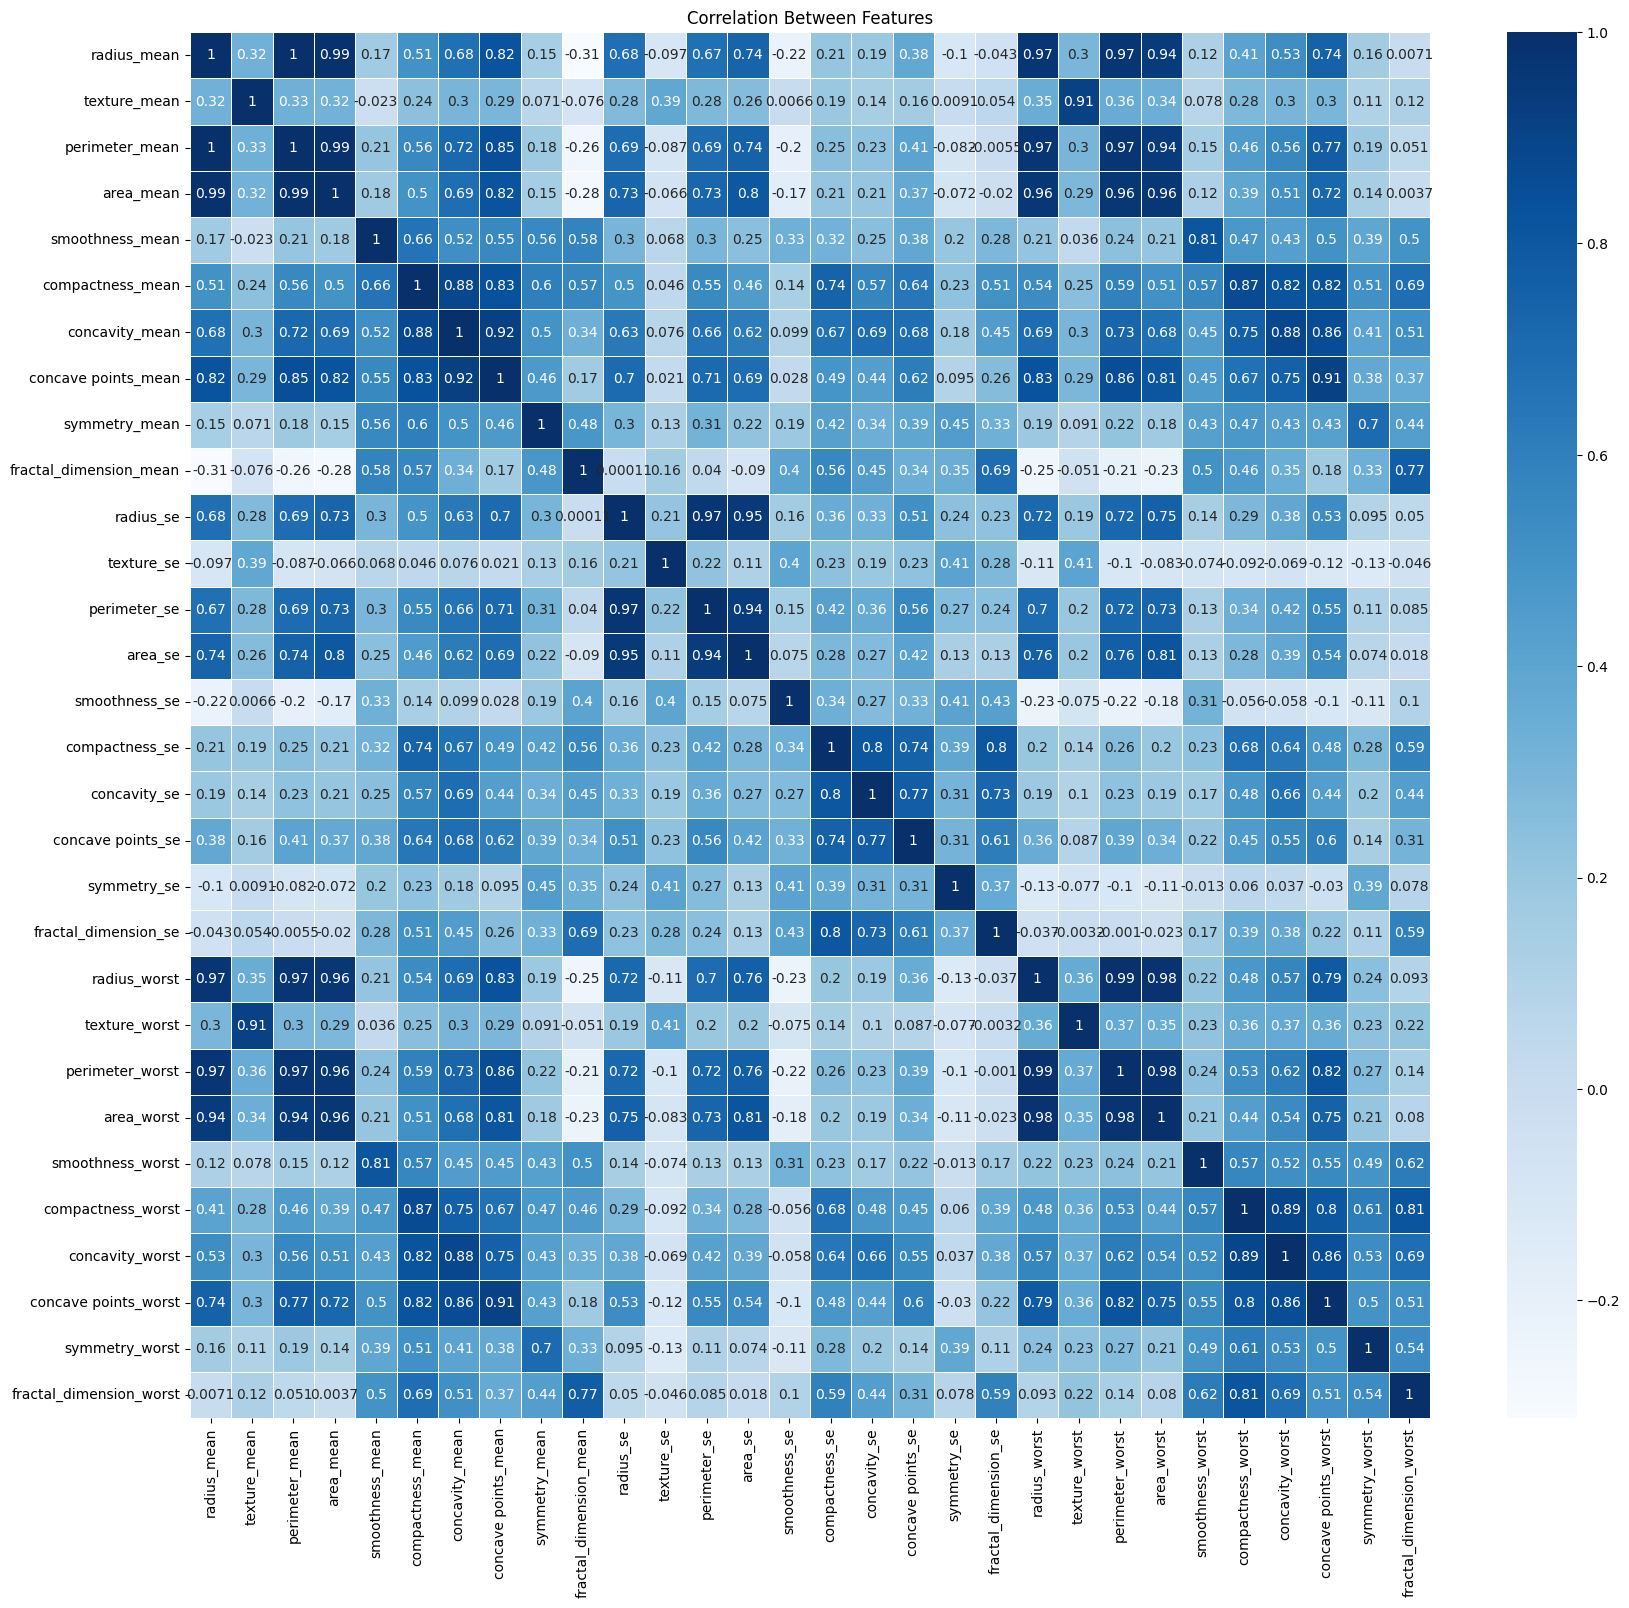

In [101]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = BreastCancer.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

In [102]:
df_mean=BreastCancer.iloc[:,1:11]
df_mean.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2                 0.05999  
3                 0.09744  
4                 0.05883

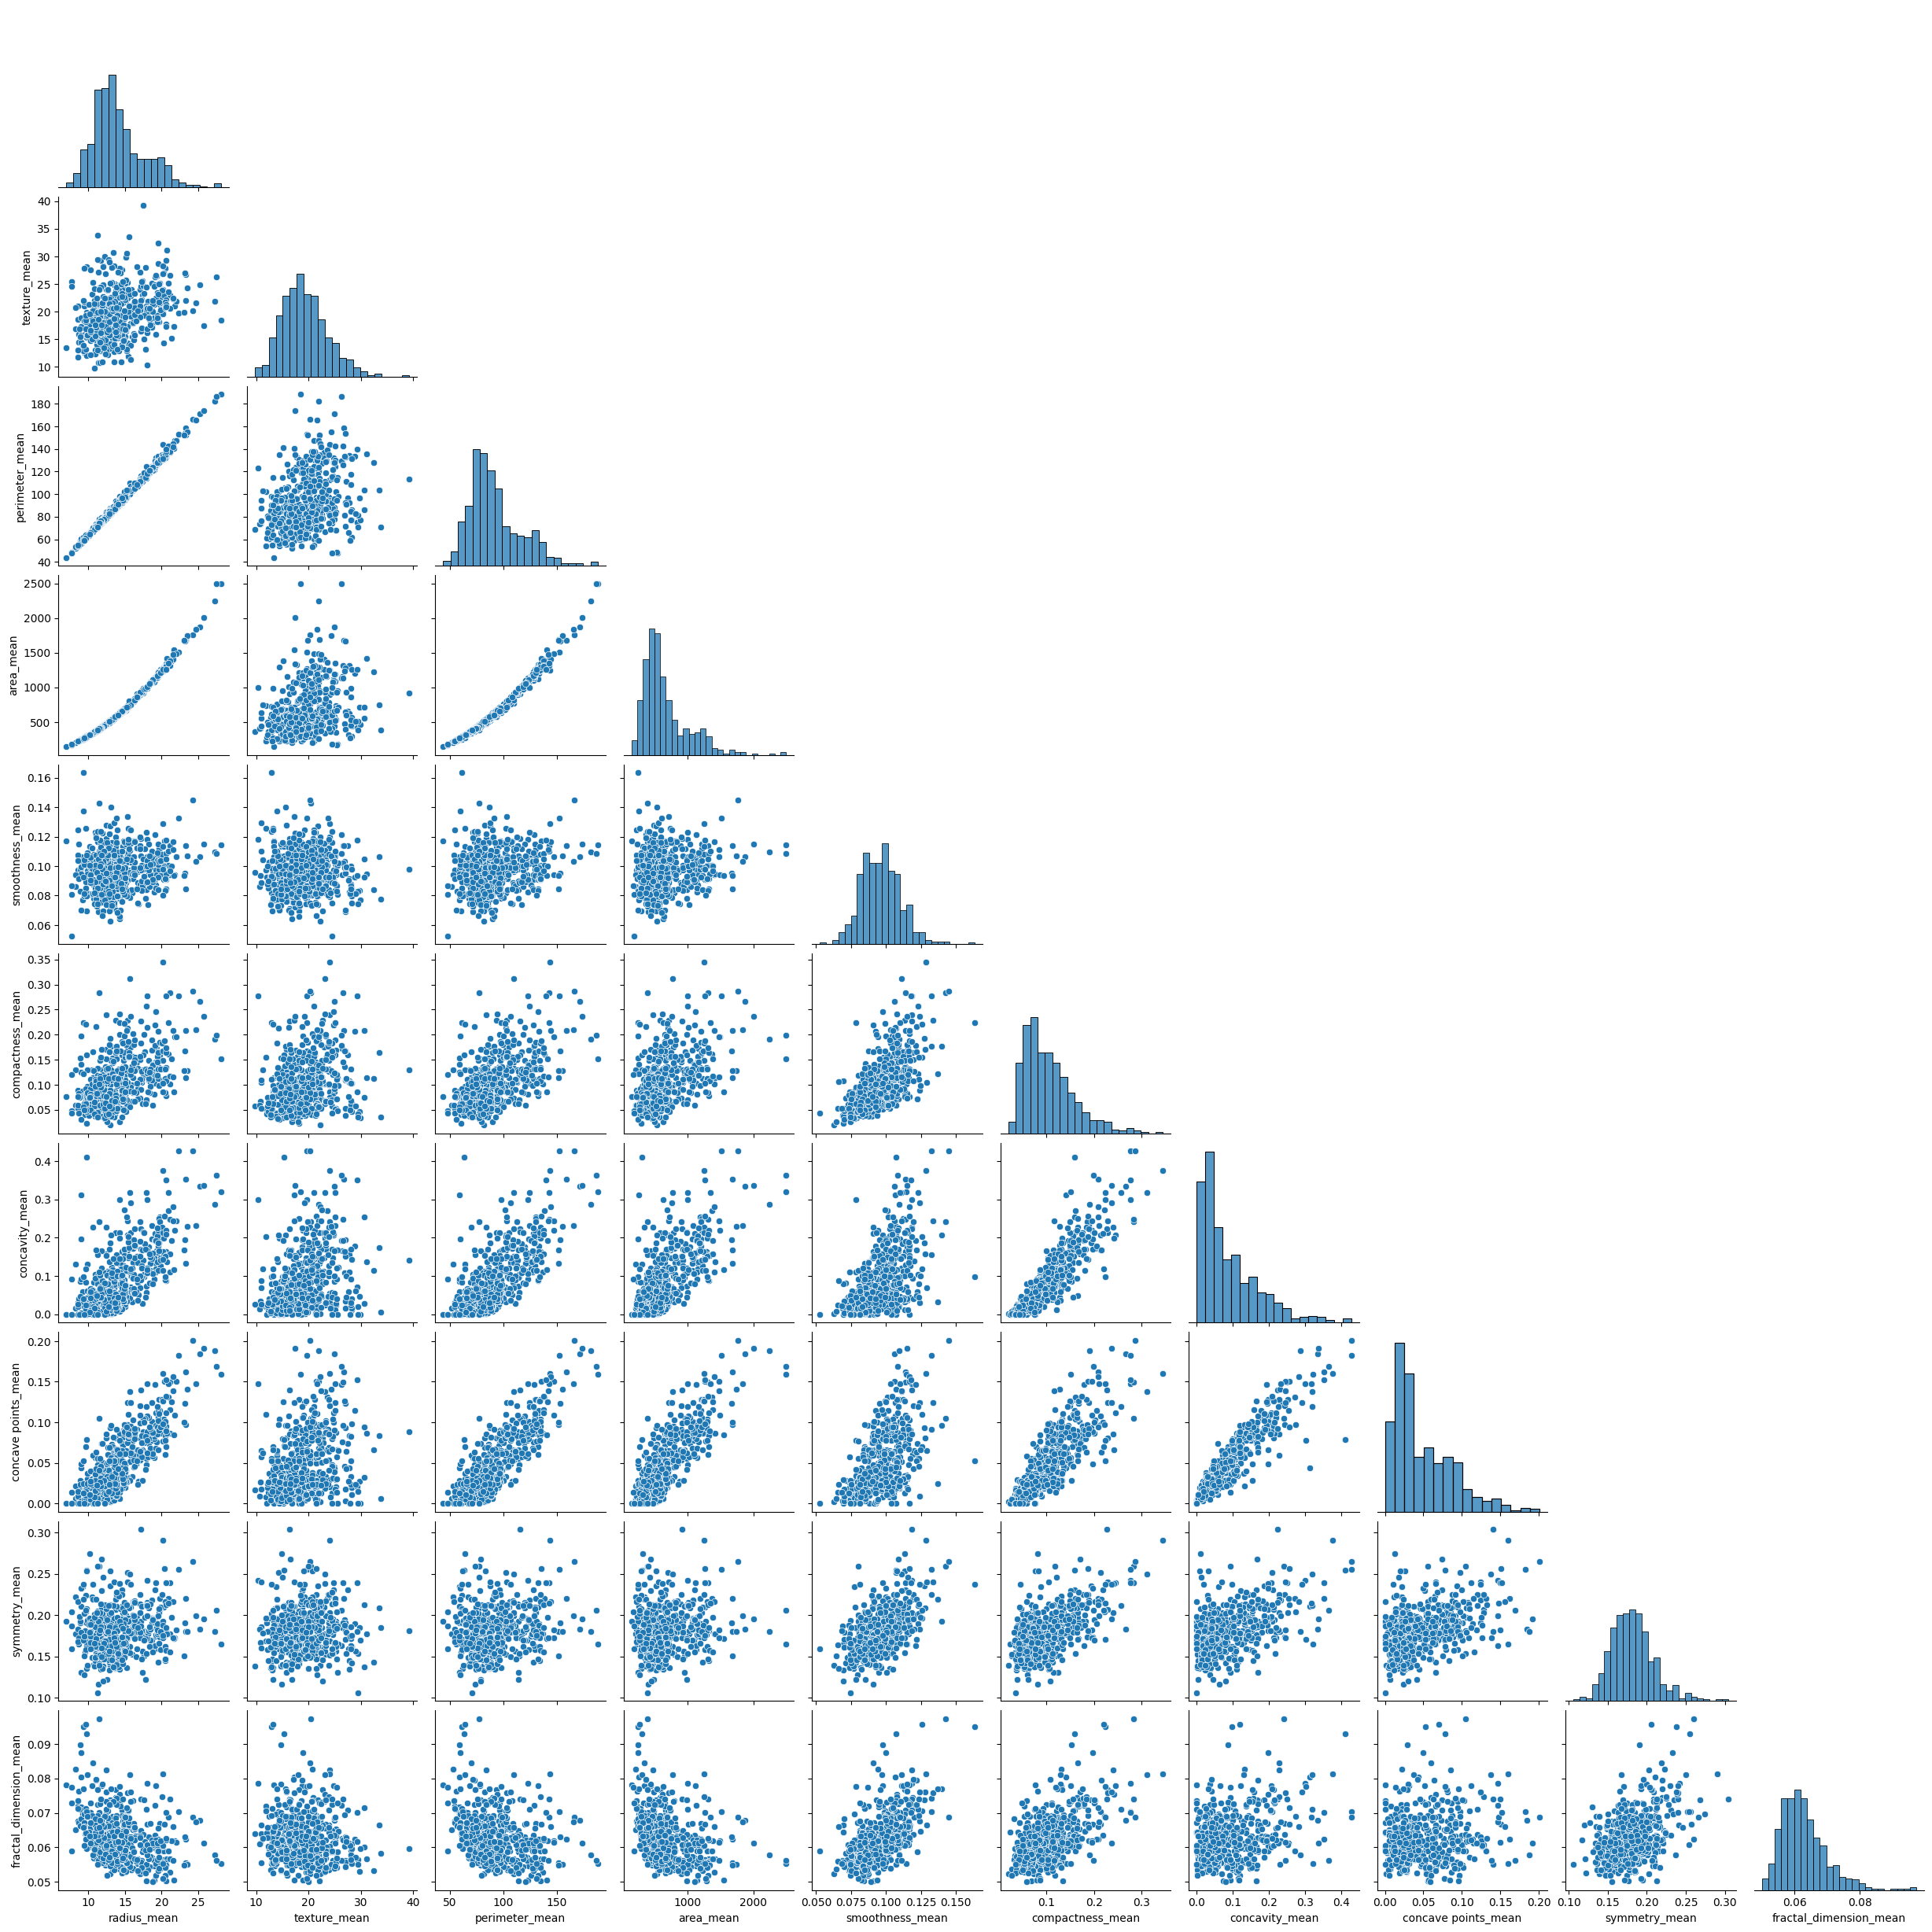

In [103]:
sns.pairplot(df_mean,corner=True)

In [104]:
df_se=BreastCancer.iloc[:,11:21]
df_se.head()

radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0     1.0950      0.9053         8.589   153.40       0.006399   
1     0.5435      0.7339         3.398    74.08       0.005225   
2     0.7456      0.7869         4.585    94.03       0.006150   
3     0.4956      1.1560         3.445    27.23       0.009110   
4     0.7572      0.7813         5.438    94.44       0.011490   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0         0.04904       0.05373            0.01587      0.03003   
1         0.01308       0.01860            0.01340      0.01389   
2         0.04006       0.03832            0.02058      0.02250   
3         0.07458       0.05661            0.01867      0.05963   
4         0.02461       0.05688            0.01885      0.01756   

   fractal_dimension_se  
0              0.006193  
1              0.003532  
2              0.004571  
3              0.009208  
4              0.005115

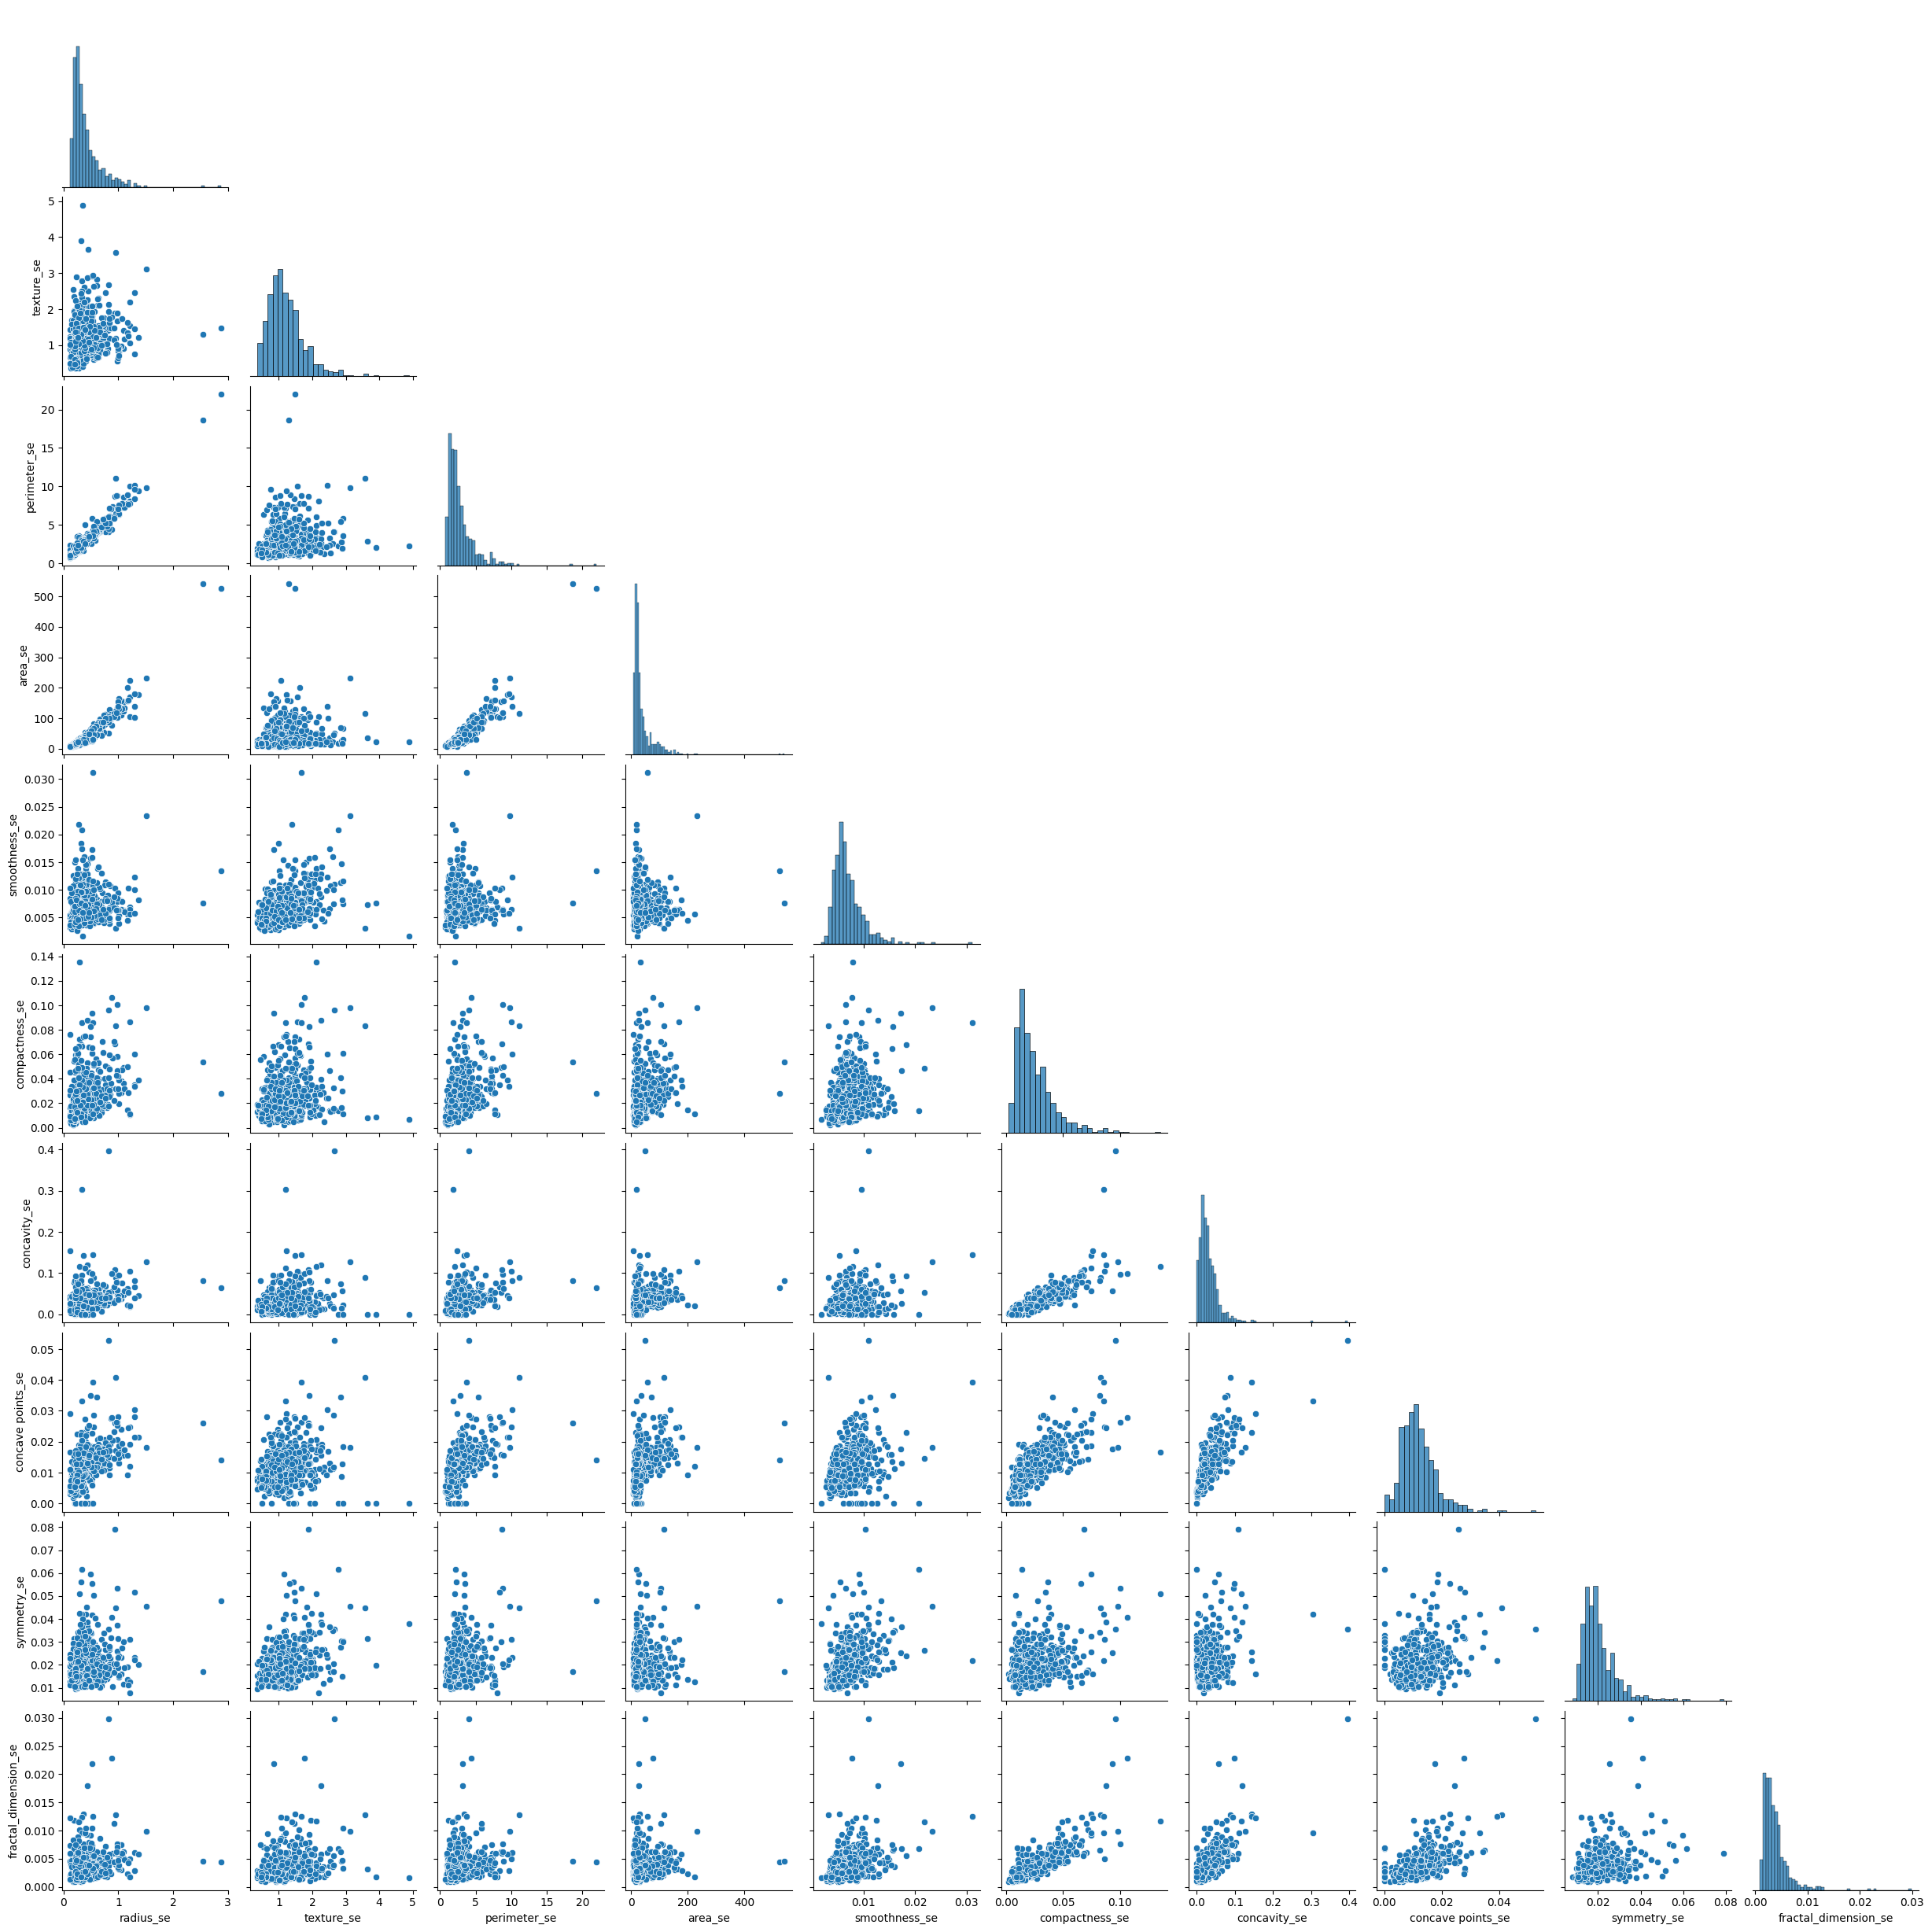

In [105]:
sns.pairplot(df_se,corner=True)

In [106]:
df_worst=BreastCancer.iloc[:,21:]
df_worst.head()

radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

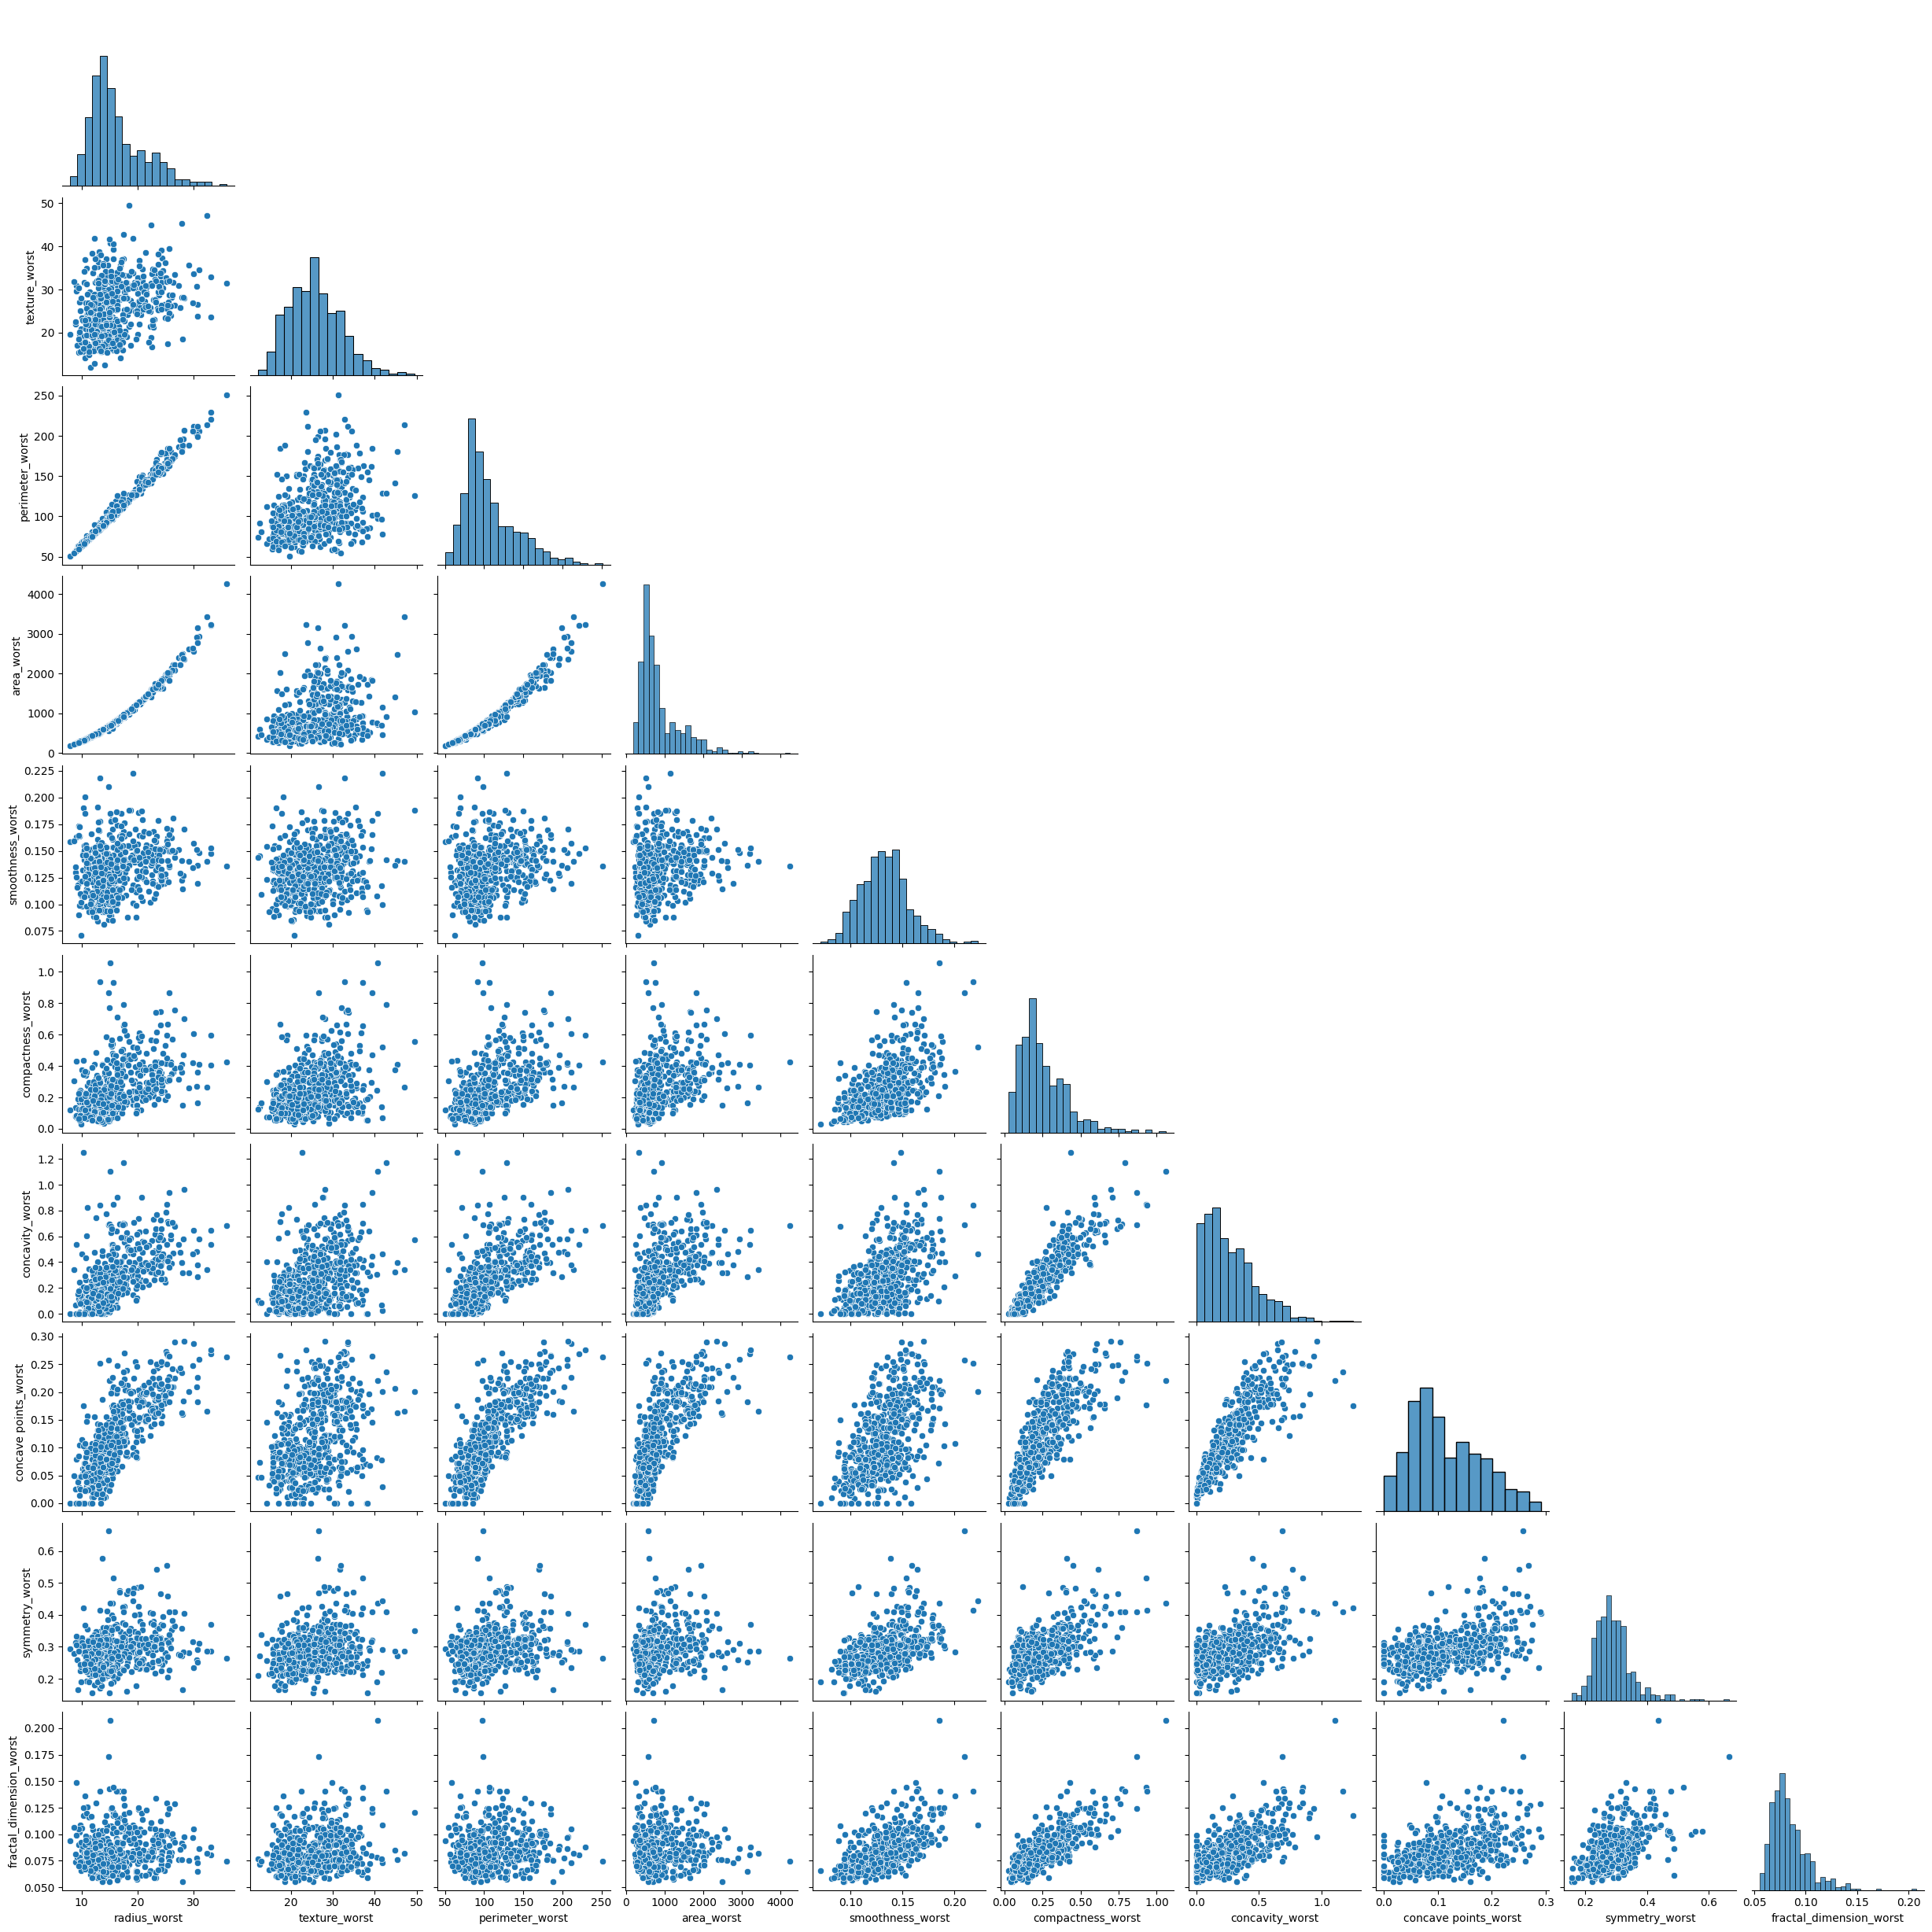

In [107]:
sns.pairplot(df_worst,corner=True)

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

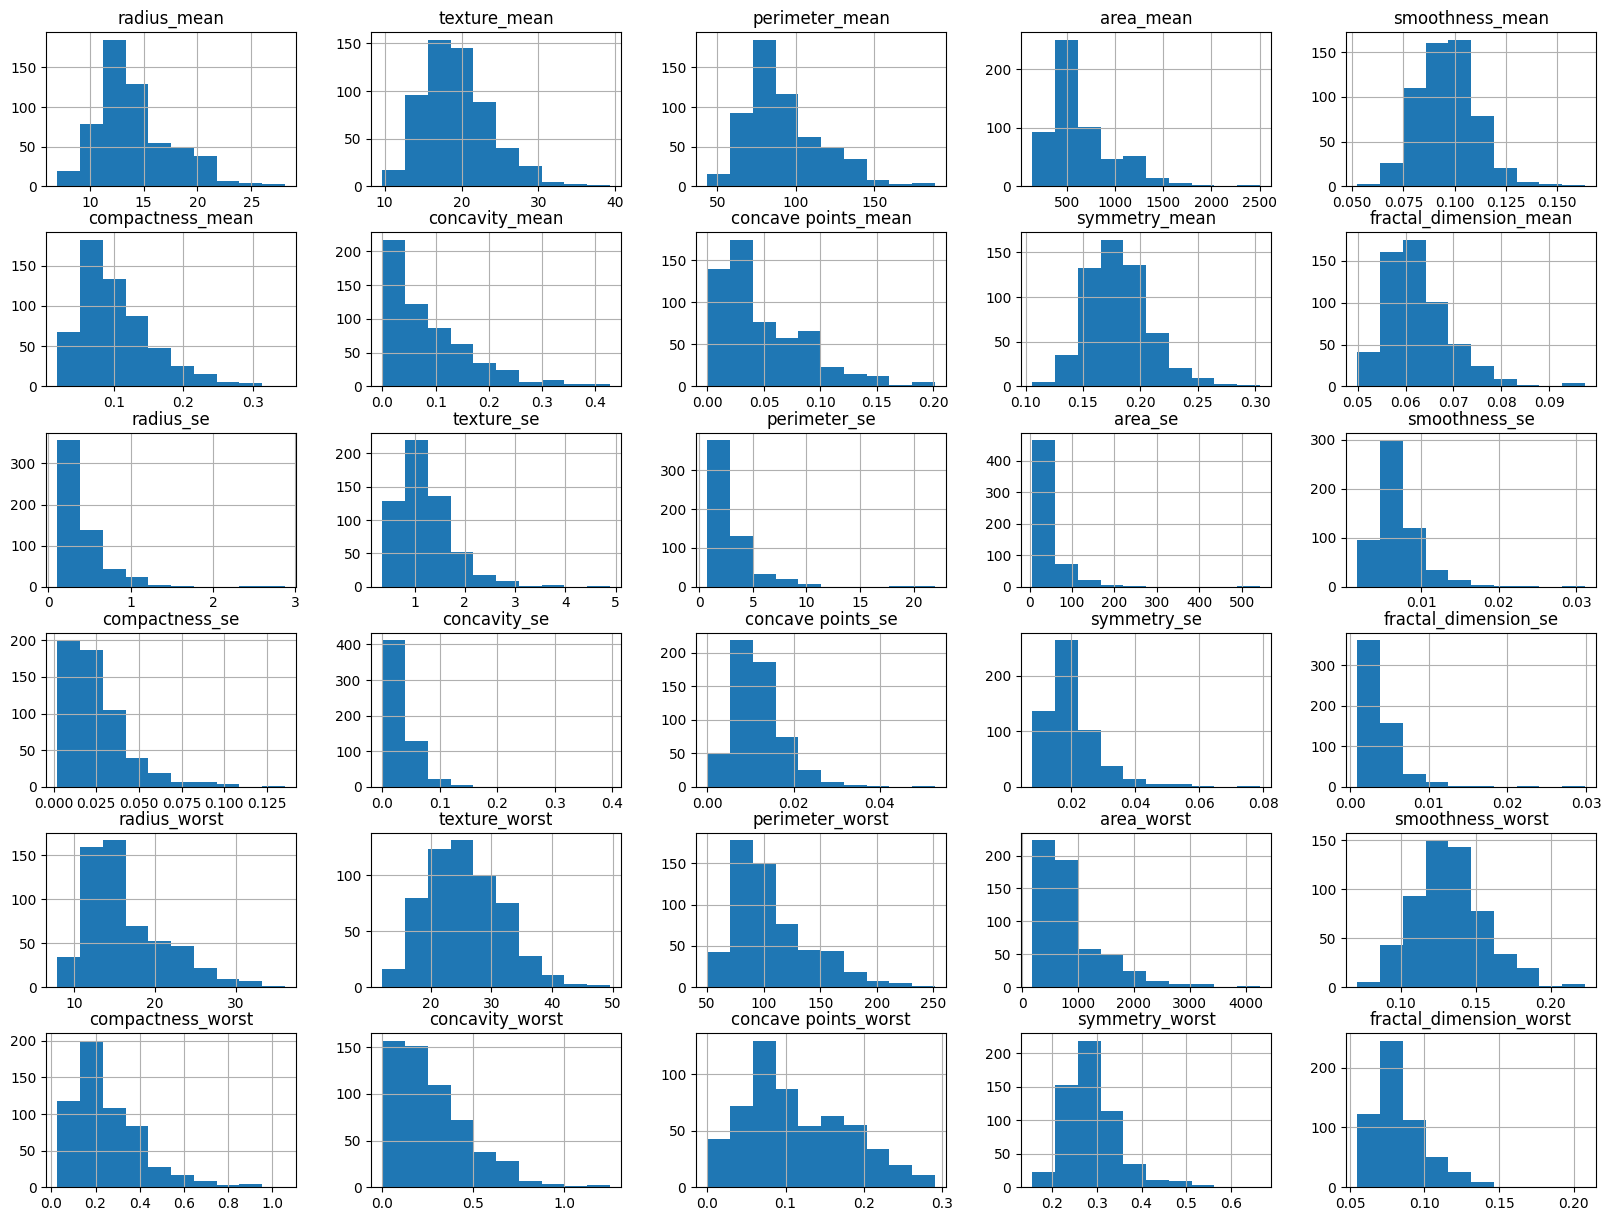

In [108]:
BreastCancer.hist(figsize=(20,15))

## 3.Data Pre Processing

In [109]:
BreastCancer.duplicated().sum()

np.int64(0)

No Duplicates in Data

In [110]:
BreastCancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No Null Values

### Label Encoding
we will encode "diagnosis" as 0 for ‘B’ (Benign) and 1 ‘M’ (Malignant).

In [111]:
BreastCancer['diagnosis']=BreastCancer['diagnosis'].map({ 'B': 0 , 'M' : 1 })

In [112]:
BreastCancer['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [113]:
y=BreastCancer['diagnosis']
X=BreastCancer.drop(columns='diagnosis',axis=1)

In [114]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### Remove Highly Correlated Features

In [115]:
# Calculate the correlation matrix

CorrMatrix = X.corr().abs()
CorrMatrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581      0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean      0.311631      0.076437        0.261477   0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                  0.097317      0.386358        0.086761   0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se               0.222600      0.006614        0.202694   0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                 0.104321      0.009127        0.081629   0.072497   
fractal_dimension_se        0.042641      0.054458        0.005523   0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                    0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [116]:
# Select Upper triangle of correlation matrix
upper = CorrMatrix.where(np.triu(np.ones(CorrMatrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X = X.drop(to_drop, axis=1)

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

Number of features reduced to 20 feature

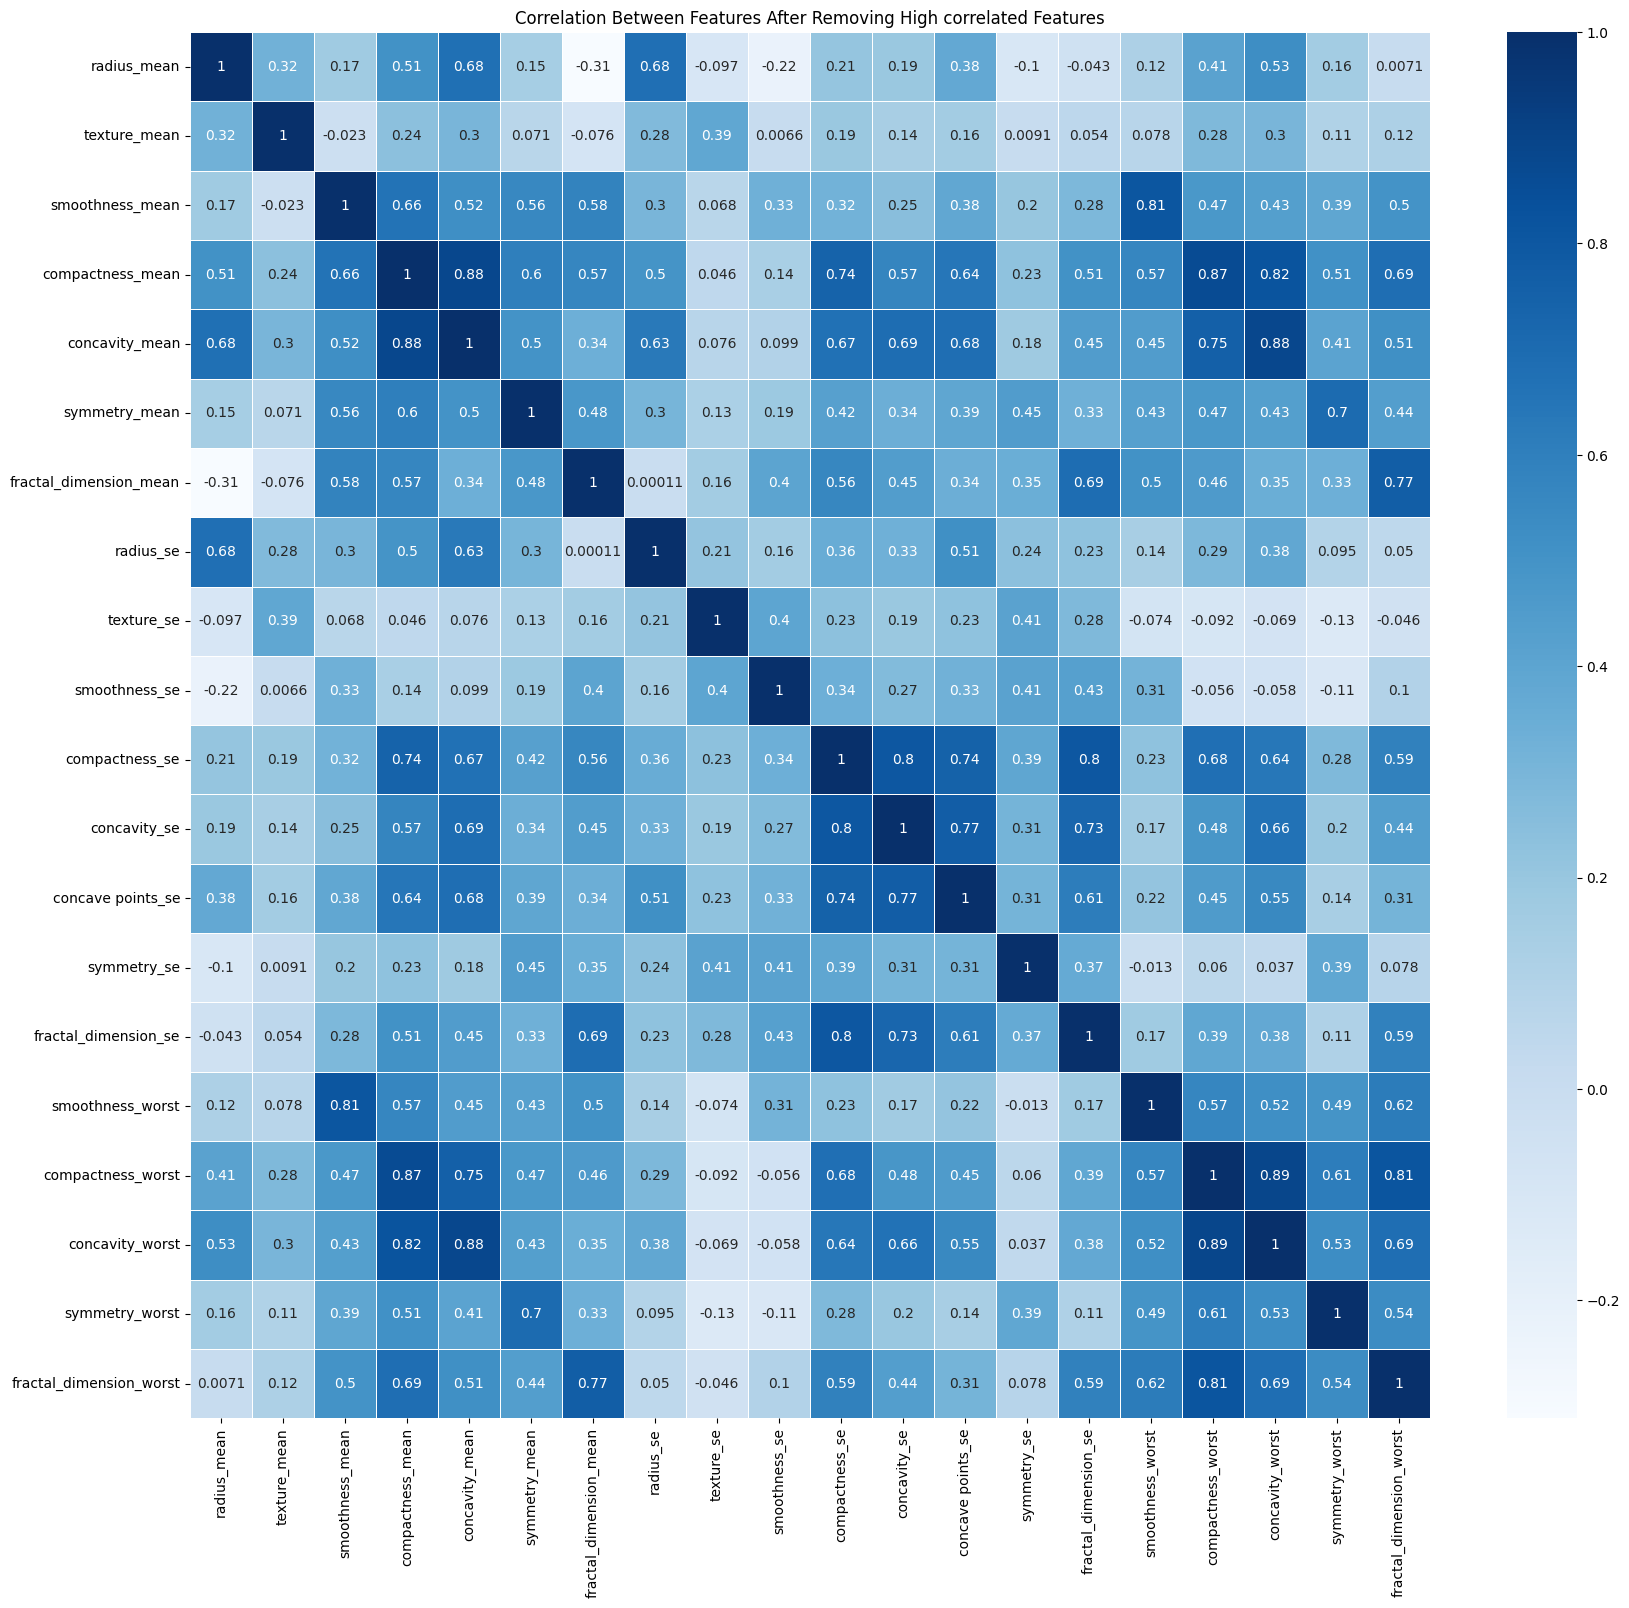

In [118]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = X.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features After Removing High correlated Features')
plt.show()

# Features Selection by Random Forest

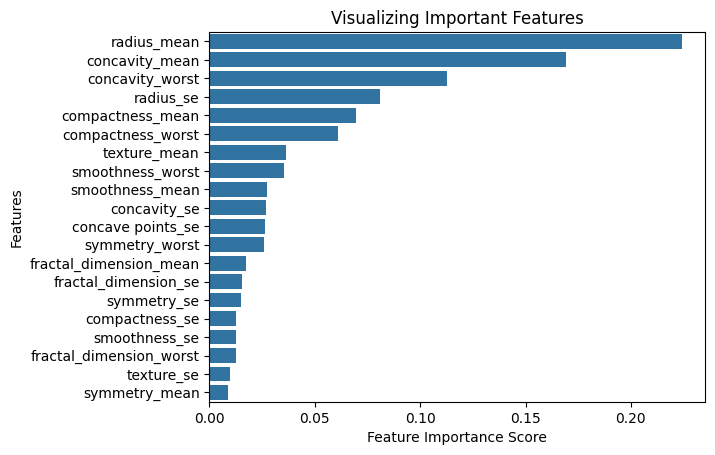

In [119]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sorted_features = feature_scores.index
sorted_scores = feature_scores.values
sns.barplot(x=feature_scores, y=feature_scores.index, orient = 'h')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")
sorted_features
# Visualize the graph
plt.show()

In [120]:
sorted_features = feature_scores.sort_values(ascending=False)
X = X[sorted_features.index]

# Display the first few rows of the rearranged DataFrame
X.head(25)

radius_mean  concavity_mean  concavity_worst  radius_se  compactness_mean  \
0        17.990         0.30010          0.71190     1.0950           0.27760   
1        20.570         0.08690          0.24160     0.5435           0.07864   
2        19.690         0.19740          0.45040     0.7456           0.15990   
3        11.420         0.24140          0.68690     0.4956           0.28390   
4        20.290         0.19800          0.40000     0.7572           0.13280   
5        12.450         0.15780          0.53550     0.3345           0.17000   
6        18.250         0.11270          0.37840     0.4467           0.10900   
7        13.710         0.09366          0.26780     0.5835           0.16450   
8        13.000         0.18590          0.53900     0.3063           0.19320   
9        12.460         0.22730          1.10500     0.2976           0.23960   
10       16.020         0.03299          0.14590     0.3795           0.06669   
11       15.780         0.09954          0.39650     0.5058           0.12920   
12       19.170         0.20650          0.36390     0.9555           0.24580   
13       15.850         0.09938          0.23220     0.4033           0.10020   
14       13.730         0.21280          0.69430     0.2121           0.22930   
15       14.540         0.16390          0.70260     0.3700           0.15950   
16       14.680         0.07395          0.29140     0.4727           0.07200   
17       16.130         0.17220          0.47840     0.5692           0.20220   
18       19.810         0.14790          0.53720     0.7582           0.10270   
19       13.540         0.06664          0.23900     0.2699           0.08129   
20       13.080         0.04568          0.18900     0.1852           0.12700   
21        9.504         0.02956          0.08867     0.2773           0.06492   
22       15.340         0.20770          0.63050     0.4388           0.21350   
23       21.160         0.10970          0.31550     0.6917           0.10220   
24       16.650         0.15250          0.46950     0.8068           0.14570   

    compactness_worst  texture_mean  smoothness_worst  smoothness_mean  \
0              0.6656         10.38            0.1622          0.11840   
1              0.1866         17.77            0.1238          0.08474   
2              0.4245         21.25            0.1444          0.10960   
3              0.8663         20.38            0.2098          0.14250   
4              0.2050         14.34            0.1374          0.10030   
5              0.5249         15.70            0.1791          0.12780   
6              0.2576         19.98            0.1442          0.09463   
7              0.3682         20.83            0.1654          0.11890   
8              0.5401         21.82            0.1703          0.12730   
9              1.0580         24.04            0.1853          0.11860   
10             0.1551         23.24            0.1181          0.08206   
11             0.5609         17.89            0.1396          0.09710   
12             0.3903         24.80            0.1037          0.09740   
13             0.1924         23.95            0.1131          0.08401   
14             0.7725         22.61            0.1651          0.11310   
15             0.6577         27.54            0.1678          0.11390   
16             0.1871         20.13            0.1464          0.09867   
17             0.4233         20.68            0.1789          0.11700   
18             0.3150         22.15            0.1512          0.09831   
19             0.1773         14.36            0.1440          0.09779   
20             0.2776         15.71            0.1312          0.10750   
21             0.1148         12.44            0.1324          0.10240   
22             0.5954         14.26            0.1390          0.10730   
23             0.2600         23.04            0.1401          0.09428   
24             0.3578         21.38            

In [121]:
X = X.iloc[ : , : 13]

### Dectict Outliers in Data

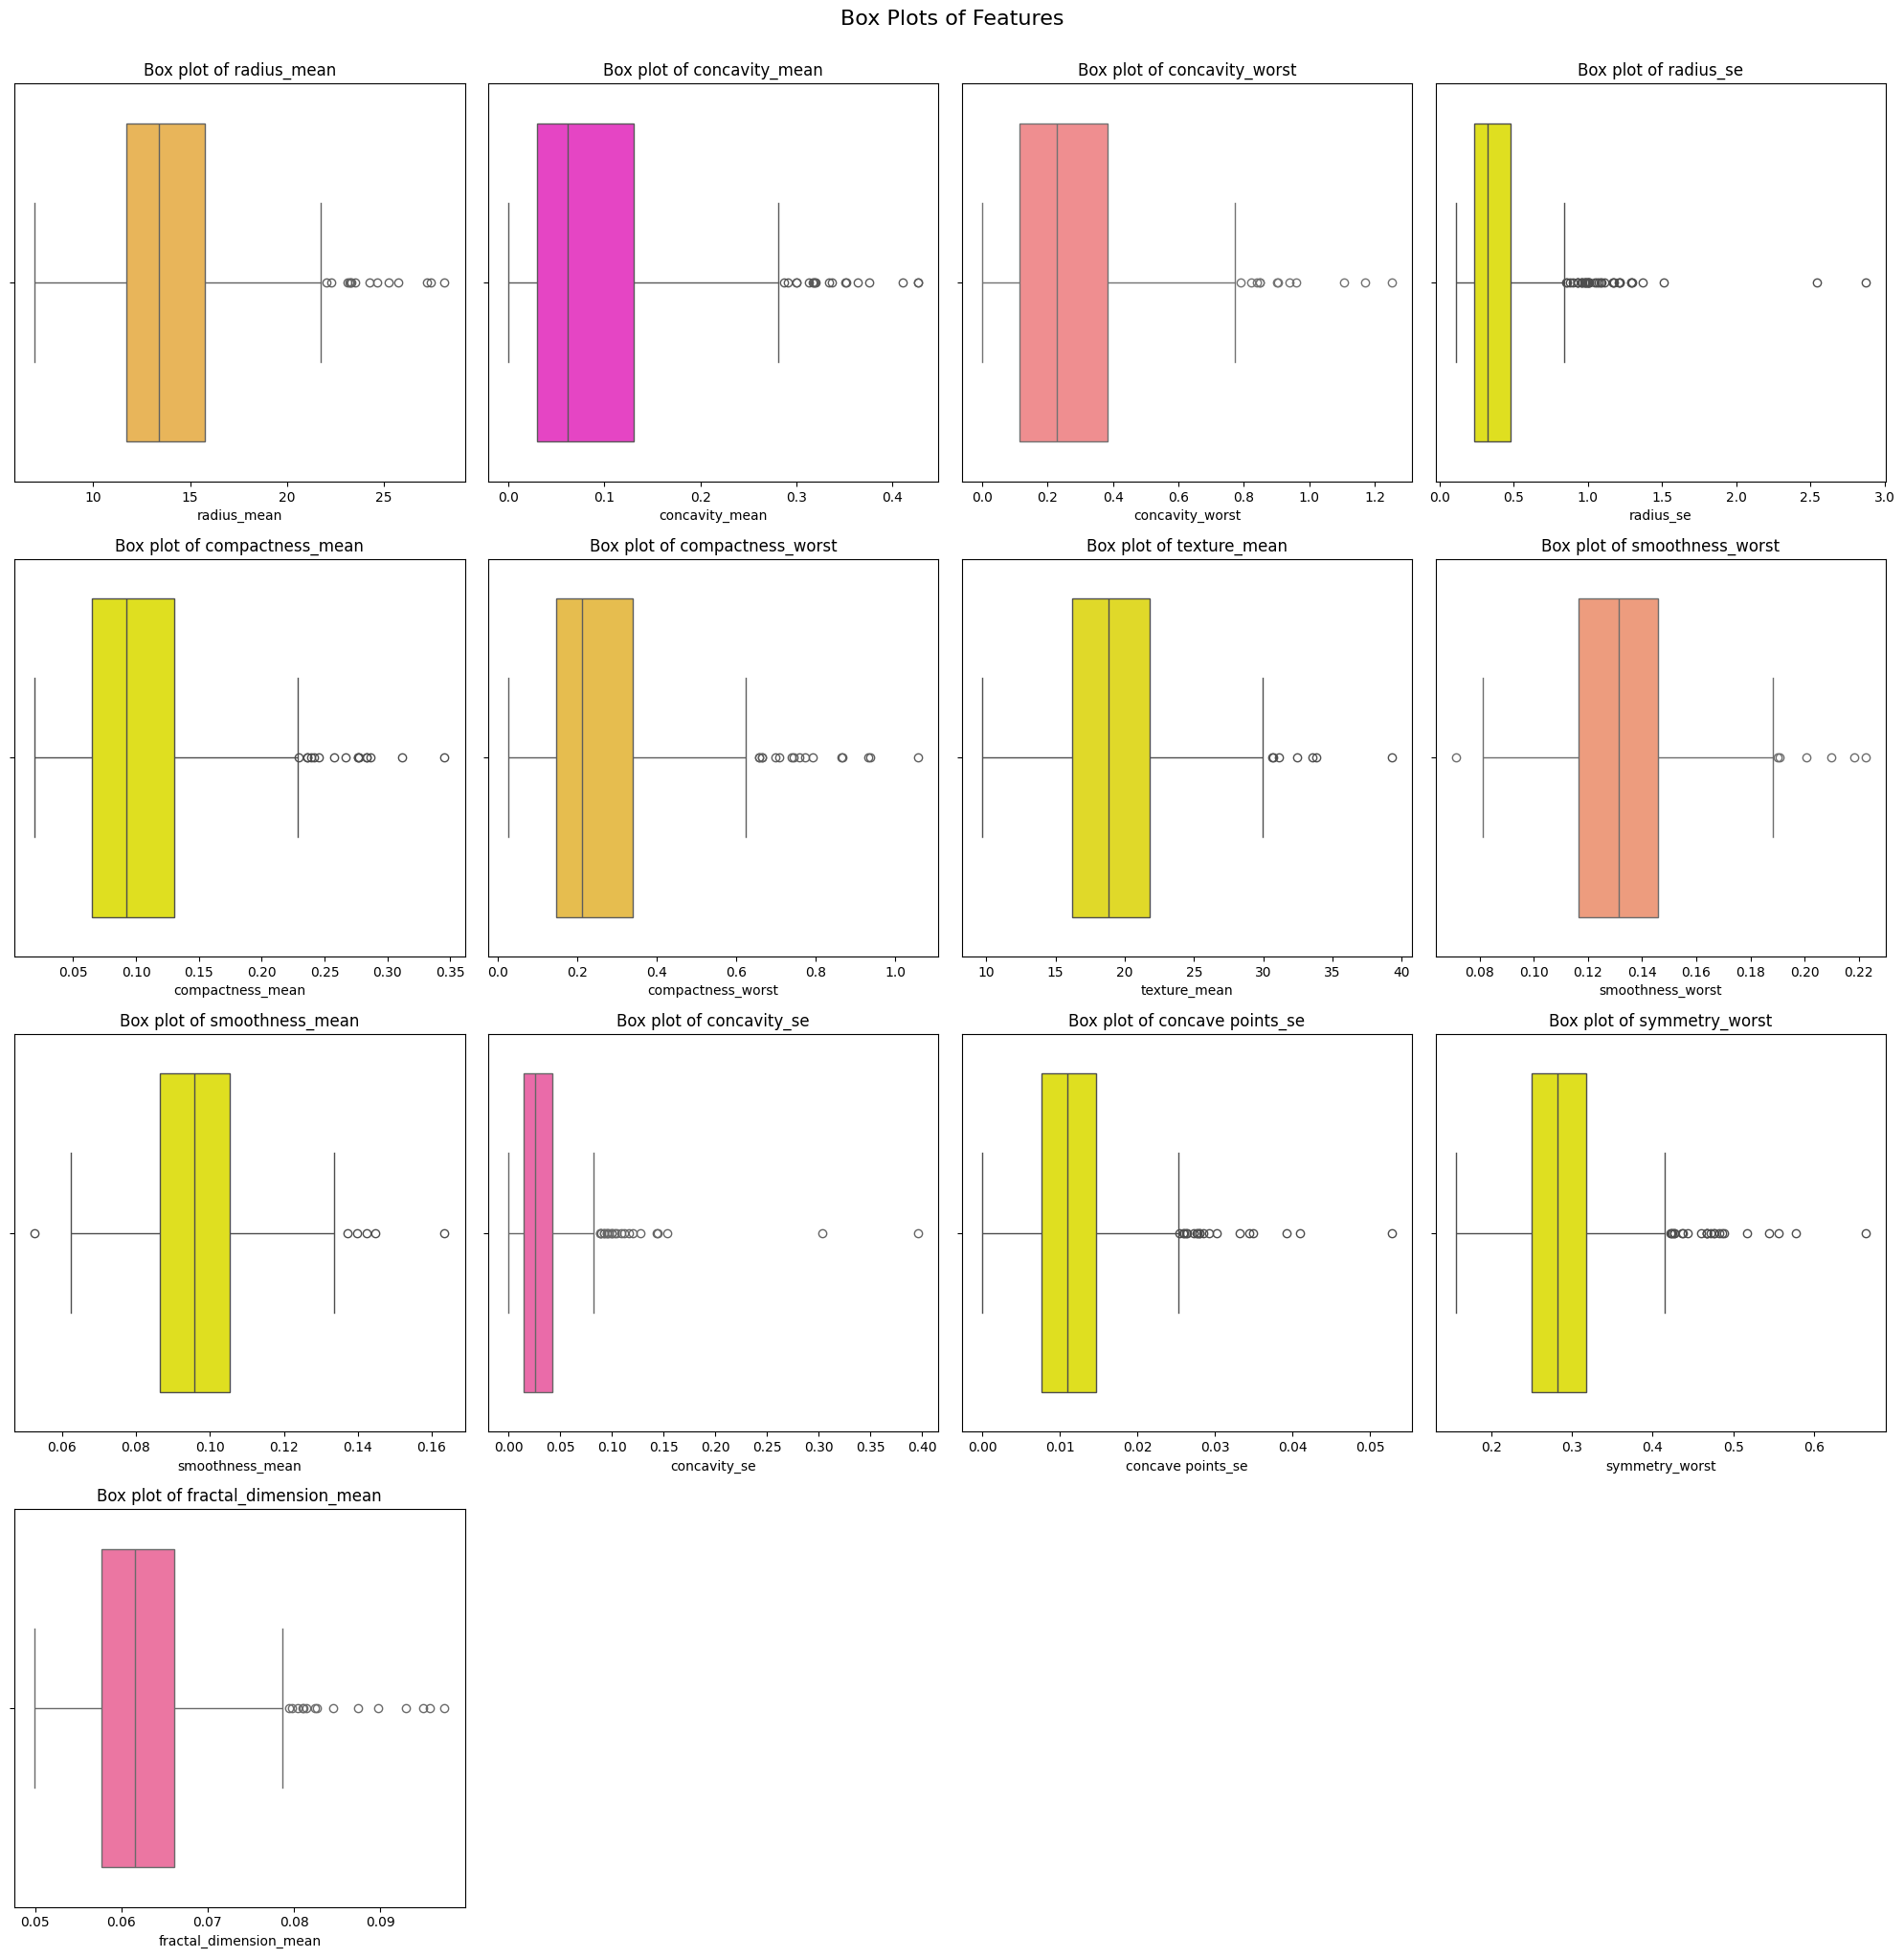

In [122]:
num_colors = 20
indices = np.linspace(0, 400, 1000, dtype=int)
np.random.shuffle(indices)
selected_indices = indices[:num_colors]
colors = [cm.spring(x) for x in selected_indices]
#Box Plot
def print_boxplot(df):
    n = len(df.columns)
    rows = int(np.ceil(n/4))

    fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

    # Flatten the axes array, to make iterating over it easier
    axs = axs.flatten()

    for i, (c, color) in enumerate(zip(df, colors)):
        sns.boxplot(x=df[c],color=color, ax=axs[i])
        axs[i].set_title(f'Box plot of {c}')

    # Remove any unused subplots
    if n % 4:
        for j in range(n, rows*4):
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
    plt.show()

print_boxplot(X)

### Feature Scaling
the input numerical attributes have very different scales.  
using StandardScaler to get all attributes to have the same scale

In [123]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)

In [124]:
X

array([[ 1.13235294,  2.3587107 ,  1.80774963, ...,  0.69852941,
         2.63555556,  2.0391924 ],
       [ 1.76470588,  0.25074155,  0.05551416, ...,  0.34926471,
        -0.10666667, -0.5783848 ],
       [ 1.54901961,  1.34328653,  0.83345753, ...,  1.3645362 ,
         1.17185185, -0.18408551],
       ...,
       [ 0.79166667,  0.30620921,  0.42324888, ...,  0.6561086 ,
        -0.89481481, -0.60095012],
       [ 1.77205882,  2.86592842,  2.65275708, ...,  0.8074095 ,
         1.87407407,  1.02375297],
       [-1.375     , -0.60846352, -0.84463487, ..., -1.54553167,
         0.07259259, -0.32066508]])

### Split Data for Training and Testing

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

# Models

## Decision Tree

In [126]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Model_arr
model_arr=[]
# Accuracy_arr
accuracy_arr=[]



y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini


model_arr.append('Decision Tree gini')
accuracy_arr.append(accuracy_score(y_test, y_pred_gini)*100)


print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

cr=classification_report(y_test, y_pred_gini)
print(cr)


Model accuracy score with criterion gini index: 0.9386
Training set score: 0.9868
Test set score: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [127]:
cm=pd.DataFrame(confusion_matrix(y_test, y_pred_gini))
cm

0   1
0  70   2
1   5  37

In [128]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
# fit the model
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

#append the model and accuracy to the data frame 
model_arr.append('Decision Tree entropy')
accuracy_arr.append(accuracy_score(y_test, y_pred_entropy)*100)

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

cr=classification_report(y_test, y_pred_entropy)
print(cr)

Model accuracy score with criterion entropy index: 0.9298
Training set score: 0.9868
Test set score: 0.9386
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [129]:
cm=pd.DataFrame(confusion_matrix(y_test,y_pred_entropy))
cm

0   1
0  71   1
1   7  35

## Random Forest

In [130]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)


y_pred = RFC.predict(X_test)

model_arr.append('Rondom Forest')
accuracy_arr.append(accuracy_score(y_test, y_pred)*100)

training_accuracy = RFC.score(X_train, y_train)
print("Training Accuracy with 10 decision-trees:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = RFC.score(X_test, y_test)
print("Testing Accuracy with 10 decision-trees:", testing_accuracy)


cr=classification_report(y_test, y_pred)
print(cr)

Training Accuracy with 10 decision-trees: 1.0
Testing Accuracy with 10 decision-trees: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [131]:
cm=pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

0   1
0  71   1
1   5  37

## KNN

In [132]:
model=KNeighborsClassifier(n_neighbors=21)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model_arr.append('KNN')
accuracy_arr.append(accuracy_score(y_test, y_pred)*100)


# Calculate the training accuracy
training_accuracy = model.score(X_train, y_train)
print("Training Accuracy with 21 neighbors:", training_accuracy)


# Calculate the testing accuracy
testing_accuracy = model.score(X_test, y_test)
print("Testing Accuracy with 21 neighbors:", testing_accuracy)

cr=classification_report(y_test, y_pred)
print(cr)

Training Accuracy with 21 neighbors: 0.9538461538461539
Testing Accuracy with 21 neighbors: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [133]:
cm=pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

0   1
0  71   1
1   5  37

## Logistic Regression

In [134]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

model_arr.append('Logistic Regression')
accuracy_arr.append(accuracy_score(y_test, y_pred)*100)

training_accuracy = classifier.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)


# Calculate the testing accuracy
testing_accuracy = classifier.score(X_test, y_test)
print("Testing Accuracy :", testing_accuracy)

print(classification_report(y_test, y_pred))



Training Accuracy: 0.9846153846153847
Testing Accuracy : 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [135]:
cm=pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

0   1
0  72   0
1   2  40

## SVM

In [136]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

model_arr.append('SVM')
accuracy_arr.append(accuracy_score(y_test, y_pred)*100)


# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [137]:
acc_df=pd.DataFrame(columns=['Model', 'Accuracy'])
acc_df['Model']=model_arr
acc_df['Accuracy']=accuracy_arr

## Accuracy Comparison Between Models

C:\Users\RTX\AppData\Local\Temp\ipykernel_18624\3038338502.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


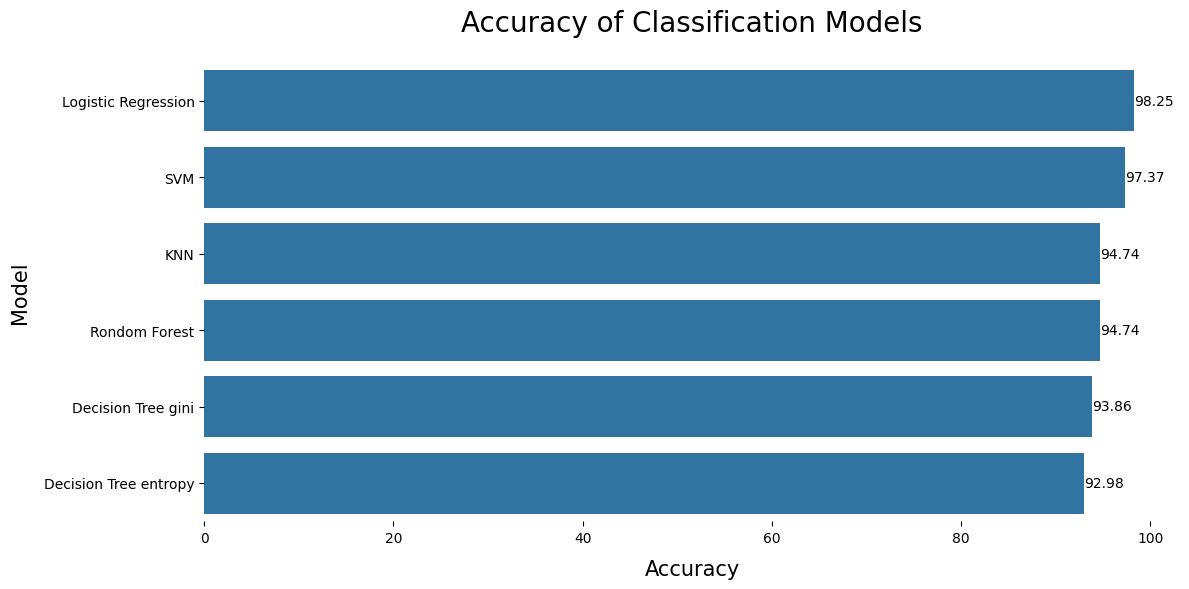

In [138]:

model_arr.append('Rondom Forest')
accuracy_arr.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
sorted_df = acc_df.sort_values('Accuracy', ascending=False)
ax = sns.barplot(data=sorted_df, y='Model', x='Accuracy', orient ="h")
ax.set_xlabel('Accuracy', fontsize=15, labelpad=10)
ax.set_ylabel('Model', fontsize=15, labelpad=10)
ax.set_title('Accuracy of Classification Models', fontsize=20, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Annotate the bars with their values
for patch in ax.patches:
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    center_y = y + height / 2
    right_x = x + width
    ax.text(right_x + 0.01, center_y, round(width, 2),
            ha='left', va='center', fontsize=10)
    
plt.show()

# Deployment

In [140]:
import joblib

joblib_file = 'Binary_Classification_Prediction_for_type_of_Breast_Cancer[1]'
joblib.dump(classifier, joblib_file)
model = joblib.load(open("Binary_Classification_Prediction_for_type_of_Breast_Cancer[1]", 'rb'))
sample_data = [13.080000, 0.045680, 0.189000, 0.185200, 0.127000, 0.277600,
               15.710000, 0.131200, 0.107500, 0.016980, 0.006490, 0.318400, 0.068110]
sample_prediction = model.predict([sample_data])
print(sample_prediction)

[1]
